# Телекоммуникации

## Введение

### Описание проекта

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Наша задача — обучить на этих данных модель для прогноза оттока клиентов.

### Цель проекта

Построить модель, которая будет эффективно предсказывать отток клиентов.

### Описание исследования

Оператор предоставляет два основных типа услуг: 
- Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).


Также доступны такие услуги:
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).
- Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.

### Задачи исследования

Шаг 1. Загрузка данных.
Загрузить данные и выполнить их первичный осмотр.


Шаг 2. Исследовательский анализ и предобработка данных.
Выполнить исследовательский анализ каждого датафрейма и при необходимости выполнить предобработку. Сделайть выводы об имеющихся признаках: понадобятся ли они для обучения моделей.


Шаг 3. Объединение данных.
Объединить выбранные нами признаки в один датафрейм по ключу.


Шаг 4. Исследовательский анализ и предобработка данных объединённого датафрейма
Выполнить исследовательский анализ объединённого датафрейма, визуализировать распределения признаков и при необходимости выполнить предобработку. Провести корреляционный анализ. Мы можем использовать не только имеющиеся признаки, но и генереировать новые.


Шаг 5. Подготовка данных.
Выполнить подготовку данных для обучения модели. Разделите данные на две выборки, при масштабировании и кодировании учитывать особенности данных и моделей.


Шаг 6. Обучение моделей машинного обучения.
Обучить как минимум две модели. Хотя бы для одной из них подберите как минимум два гиперпараметра.


Шаг 7. Выбор лучшей модели.
Выберать лучшую модель и проверьте её качество на тестовой выборке.


Шаг 8. Общий вывод и рекомендации заказчику.
Сделать общий вывод о проделанной работе: описать основные этапы работы, полученные результаты и дать рекомендации для бизнеса.

**Условия задачи:**

- RANDOM_STATE = 23122;
- Соотношение train/test = 3:1;
- Используем кросс-валидацию;
- Следим за утечкой целевого признака (если больше >= 0.95 - ишем утечку);
- Разные модели требуют разную обработку данных - следим за используемымыи трансформерами, корректно обучаем;
- Следим за типами данных (особе внимание на SeniorCitizen)$
- Метрика AUC-ROC >= 0.85.

### Исходные данные

Данные состоят из нескольких файлов, полученных из разных источников:
- `contract_new.csv` — информация о договоре;
- `personal_new.csv` — персональные данные клиента;
- `internet_new.csv` — информация об интернет-услугах;
- `phone_new.csv` — информация об услугах телефонии.


Файл `contract_new.csv`:

- `customerID` — идентификатор абонента;
- `BeginDate` — дата начала действия договора;
- `EndDate` — дата окончания действия договора;
- `Type` — тип оплаты: раз в год-два или ежемесячно;
- `PaperlessBilling` — электронный расчётный лист;
- `PaymentMethod` — тип платежа;
- `MonthlyCharges` — расходы за месяц;
- `TotalCharges` — общие расходы абонента.


Файл `personal_new.csv`:

- `customerID` — идентификатор пользователя;
- `gender` — пол;
- `SeniorCitizen` — является ли абонент пенсионером;
- `Partner` — есть ли у абонента супруг или супруга;
- `Dependents` — есть ли у абонента дети.


Файл `internet_new.csv`:

- `customerID` — идентификатор пользователя;
- `InternetService` — тип подключения;
- `OnlineSecurity` — блокировка опасных сайтов;
- `OnlineBackup` — облачное хранилище файлов для резервного копирования данных;
- `DeviceProtection` — антивирус;
- `TechSupport` — выделенная линия технической поддержки;
- `StreamingTV` — стриминговое телевидение;
- `StreamingMovies` — каталог фильмов.


Файл `phone_new.csv`:

- `customerID` — идентификатор пользователя;
- `MultipleLines` — подключение телефона к нескольким линиям одновременно.


Во всех файлах столбец `customerID` содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.
Данные также находятся в тренажёре, в папке `/datasets/`.

###  Используемые библиотеки

In [1]:
import os # для проверки наличия директорий при загрузке данных

# библиотека для редактирования текста в HTML при выводе display()
from IPython.core.display import HTML

# Основные библиотеки для работы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# библиотека для корреляционного анализа
!pip install phik -q
import phik

# загружаем классы для подготовки данных
!pip install -Uq scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем нужные модели
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from catboost import CatBoostClassifier

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# метрики
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

# Для анализа SHAP значений
!pip install shap -q
import shap

# уберем предупреждения
import warnings
warnings.filterwarnings('ignore')

###  Используемые константы

In [2]:
RANDOM_STATE = 231224
TEST_SIZE = 0.25

### Свои функции использумые в проекте

**Загрузка данных**

In [3]:
def load_df(file, index=None):
    pth1 = f'/datasets/{file}'
    pth2 = f'{file}'

    if os.path.exists(pth1):
        df = pd.read_csv(pth1, index_col=index, na_values=np.nan)
    elif os.path.exists(pth2):
        df = pd.read_csv(pth2, index_col=index, na_values=np.nan)
    else:
        print('Что-то пошло не так')
    
    return df

**Функция вывода данных и их описания**

In [4]:
def get_data_info(df):
    display(df.head())
    display(HTML('<br>'))
    display(HTML('<font color="gray"><b>Информации о датафрейме</b></font>'))
    display(df.info())
    display(HTML('<br>'))
    display(HTML('<font color="gray"><b>Описание данных</b></font>'))
    display(df.describe().T)
    display(HTML('<br>'))
    display(HTML('<font color="gray"><b>Количество пропусков</b></font>'))
    display(df.isna().sum())
    display(HTML('<br>'))
    display(HTML('<font color="gray"><b>Количество дубликатов</b></font>'))
    display(df.duplicated().sum())
    display(HTML('<br>'))

**Функция для построения графиков по количественным признакам датафрейма**

In [5]:
def quan_graphs(df, df_column, hist_bins = 50):
    
    title1 = f'Гистограмма "{df_column}"'
    title2 = f'Диграмма размаха"{df_column}"'
    plt.subplots(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(df[df_column], bins = hist_bins, color='lightblue')
    plt.title(title1, fontweight='bold')
    plt.xlabel(df_column, labelpad=10)
    plt.ylabel('Количество', labelpad=10)
    plt.grid(True)

    plt.subplot(1, 2, 2)
    df.boxplot(column=df_column, figsize=(10, 3))
    plt.title(title2, fontweight='bold')
    plt.xlabel(df_column, labelpad=10)
    plt.xlabel('')
       
    plt.show()
    
    display(df[df_column].describe())

**Функция для построения графиков по категориальным признакам признакам датафрейма**

In [6]:
def сat_graphs(df, df_column):
    df[df_column].value_counts().plot(kind='barh', figsize=(10, 6), color='lightblue')
    plt.title(f'Распределение значений по столбцу {df_column}', fontweight='bold')
    plt.ylabel(f'{df_column}', labelpad=10, fontweight="bold")
    plt.xlabel('Количество', labelpad=10, fontweight="bold")

    # добавим значения к столбцам
    for index, value in enumerate(df[df_column].value_counts()):
        plt.text(value, index, str(value))
        
    plt.show()

**Функция для построения графиков по количественным признакам датафрейма по целевому признаку**

In [7]:
def quan_graphs_target(df, x, y, bins = 50):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=x, hue=y, bins = bins, palette="coolwarm", stat='density', common_norm=False)
    plt.title(f'Гистограмма "{x}"');
    plt.xlabel(x, labelpad=10)
    plt.ylabel('Количество', labelpad=10)
    plt.grid(True)
    plt.show()
    
    display(df.groupby(y)[x].describe())
    display(HTML('<br>'))

**Функция для построения графиков по категориальным признакам датафрейма по целевому признаку**

In [8]:
def сat_graphs_target(df, x, y):
    df_group = df.groupby(x)[y].value_counts(normalize=True).rename('count').reset_index()
    
    df_group['count'] *= 100
    
    plt.figure(figsize=(10, 5))
    sns.set_style('whitegrid')
    ax = sns.barplot(x=x, y='count', hue=y, data=df_group, errwidth=0, palette="coolwarm")

    # метки
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
                fontsize=10, ha='center', color='gray', va='bottom')
    
    plt.title(f'Количество сотрудников по признаку "{x}" в разрезе целевого значения', fontweight='bold')
    
    ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
    plt.ylabel('Процент сотрудников', labelpad=10)
    plt.show()

**Функция для расчета метрик задач классификации**

def metrics_logistic(y_test, predictions):
    accuracy = accuracy_score(y_test, predictions)
    display(f'accuracy : {accuracy }')
    #precision = precision_score(y_test, predictions, pos_label='вкусно')
    precision = precision_score(y_test, predictions)
    display(f'precision: {precision}')
    #recall = recall_score(y_test, predictions, pos_label='вкусно')
    recall = recall_score(y_test, predictions)
    display(f'recall: {recall}')
    
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted')
    plt.show()

In [9]:
def metrics_logistic(y_test, predictions):
    
    accuracy = accuracy_score(y_test, predictions)
    display(f'accuracy : {accuracy }')
    #precision = precision_score(y_test, predictions, pos_label='вкусно')
    precision = precision_score(y_test, predictions)
    display(f'precision: {precision}')
    #recall = recall_score(y_test, predictions, pos_label='вкусно')
    recall = recall_score(y_test, predictions)
    display(f'recall: {recall}')
    
    cm = confusion_matrix(y_test, predictions)
    cm_percentage = cm / cm.sum(axis=0, keepdims=True) * 100

    combined_cm = [[f"{value}\n({percent:.1f}%)" for value, percent in zip(row, percent_row)] 
                   for row, percent_row in zip(cm, cm_percentage)]

    sns.heatmap(cm, annot=combined_cm, fmt='', cmap='Blues_r', cbar=False, linewidths=0.5, linecolor='gray')


    plt.ylabel('True label')
    plt.xlabel('Predicted')
    plt.show()


## Загрузка данных

### Загрузка данных

Информация о договоре

In [10]:
contract_new = load_df('contract_new.csv', index='customerID')

Персональные данные клиента

In [11]:
personal_new = load_df('personal_new.csv', index='customerID')

Информация об интернет-услугах

In [12]:
internet_new = load_df('internet_new.csv', index='customerID')

Информация об услугах телефонии

In [13]:
phone_new = load_df('phone_new.csv', index='customerID')

### Общая информация о датафреймах

In [14]:
dict_df = {'contract_new': contract_new, 
           'personal_new': personal_new, 
           'internet_new': internet_new, 
           'phone_new': phone_new}

In [15]:
for k, v in dict_df.items():
    display(HTML(f'<font color="navy"><b>Вывод информации о данных {k}</b></font>'))
    get_data_info(v)

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(6)
memory usage: 440.2+ KB


None

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

37

,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
dtypes: int64(1), object(3)
memory usage: 275.1+ KB


None

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0


gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

7027

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
7590-VHVEG,DSL,No,Yes,No,No,No,No
5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   5517 non-null   object
 1   OnlineSecurity    5517 non-null   object
 2   OnlineBackup      5517 non-null   object
 3   DeviceProtection  5517 non-null   object
 4   TechSupport       5517 non-null   object
 5   StreamingTV       5517 non-null   object
 6   StreamingMovies   5517 non-null   object
dtypes: object(7)
memory usage: 344.8+ KB


None

,count,unique,top,freq
InternetService,5517,2,Fiber optic,3096
OnlineSecurity,5517,2,No,3498
OnlineBackup,5517,2,No,3088
DeviceProtection,5517,2,No,3095
TechSupport,5517,2,No,3473
StreamingTV,5517,2,No,2810
StreamingMovies,5517,2,No,2785


InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

5389

,MultipleLines
customerID,
5575-GNVDE,No
3668-QPYBK,No
9237-HQITU,No
9305-CDSKC,Yes
1452-KIOVK,Yes


<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 5575-GNVDE to 3186-AJIEK
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MultipleLines  6361 non-null   object
dtypes: object(1)
memory usage: 99.4+ KB


None

,count,unique,top,freq
MultipleLines,6361,2,No,3390


MultipleLines    0
dtype: int64

6359

### Вывод по загрузке данных

Загрузили данные, сделав поле `customerID` индексным.

Датафрейм `contract_new`:
- Описание столбцов соответствует содержимому;
- Типы данных:
    - `BeginDate` и `EndDate` необходимо перевести в формат даты после выделения целевого признака. В `EndDate` за место значения `No` поставим  2020-02-01, так как информация о договорах актуальна на 1 февраля 2020 года.
    - `TotalCharges` необходимо перевести в вещественный тип;
- Общее описание данных не вызывает вопросов;
- Cодержит 7043 строки;
- Пропуски отсутствуют;
- Количество дубликатов - 37. Пока не удаляем и проверим дубликаты после объеденения датафреймов;
- Наименования столбцов необходимо привести к змеинному регистру;
- Из `EndDate` требуется выделить целевой признак, если в значении дата - договор расторгнут, если `No` - договор действует;
- Добавим признак `срок действия договора` для анализа и возможно для построения модели.


Датафрейм `personal_new`:
- Описание столбцов соответствует содержимому;
- Типы данных:
    - `SeniorCitizen` - приведем к типу объект, так как это категориальный признак;
- Общее описание данных не вызывает вопросов;
- Cодержит 7043 строки;
- Пропуски отсутствуют;
- Дубликатов - 7027. Пока не удаляем и проверим дубликаты после объеденения датафреймов;
- Наименования столбцов необходимо привести к змеинному регистру.



Датафрейм `internet_new`:
- Описание столбцов соответствует содержимому;
- Типы данных соответствуют содержимому;
- Общее описание данных не вызывает вопросов;
- Cодержит 5517 строк. Соответственно, данные не по всем клиентам, указанным в `contract_new`;
- Пропуски отсутствуют;
- Дубликатов - 5389. Пока не удаляем и проверим дубликаты после объеденения датафреймов;
- Наименования столбцов необходимо привести к змеинному регистру.


Датафрейм `phone_new`:
- Описание столбцов соответствует содержимому;
- Типы данных соответствуют содержимому;
- Общее описание данных не вызывает вопросов;
- Cодержит 6361 строк. Соответственно, данные не по всем клиентам, указанным в `contract_new`;
- Пропуски отсутствуют;
- Дубликатов - 6359. Пока не удаляем и проверим дубликаты после объеденения датафреймов;
- Наименования столбцов необходимо привести к змеинному регистру.


## Исследовательский анализ и предобработка данных

### Предобработка данных

**Переименование столбцов**

In [16]:
# Приведение названий колонок в snake_case
for k, v in dict_df.items():
    v.columns = v.columns.str.replace('([A-Z])', r'_\1', regex=True).str.lower().str.lstrip('_')
    display(HTML(f'Колонки датафрейма {k}:'))
    display(v.columns)

Index(['begin_date', 'end_date', 'type', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges'],
      dtype='object')

Index(['gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

Index(['internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_t_v',
       'streaming_movies'],
      dtype='object')

Index(['multiple_lines'], dtype='object')

**Выделение целевого признака**

In [17]:
contract_new['target'] = contract_new['end_date'].apply(lambda x: 0 if x == 'No' else 1)

In [18]:
contract_new.sample(5)

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,target
customerID,,,,,,,,
3278-FSIXX,2019-12-01,No,Month-to-month,Yes,Mailed check,45.25,99.55,0
5940-AHUHD,2019-12-01,No,Month-to-month,No,Mailed check,70.60,141.2,0
9259-PACGQ,2017-03-01,No,Month-to-month,No,Electronic check,62.65,2412.03,0
2070-FNEXE,2019-06-01,No,Month-to-month,No,Bank transfer (automatic),76.45,636.06,0
0394-YONDK,2014-04-01,No,Two year,No,Credit card (automatic),25.15,1760.5,0


**Заполнение `end_date`**

В `end_date` за место значения `No` поставим `2020-02-01`, так как информация о договорах актуальна на 1 февраля 2020 года

In [19]:
contract_new['end_date'] = contract_new['end_date'].replace('No', '2020-02-01')

In [20]:
contract_new.sample(5)

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,target
customerID,,,,,,,,
6646-VRFOL,2015-05-01,2017-04-01,Month-to-month,Yes,Electronic check,103.85,2388.55,1
2828-SLQPF,2018-07-01,2020-02-01,Month-to-month,Yes,Bank transfer (automatic),45.00,914.85,0
9611-CTWIH,2019-10-01,2020-02-01,Month-to-month,Yes,Electronic check,89.45,357.8,0
4130-MZLCC,2019-09-01,2020-02-01,Month-to-month,No,Bank transfer (automatic),50.55,252.75,0
8714-CTZJW,2019-10-01,2020-02-01,Month-to-month,Yes,Credit card (automatic),82.85,331.4,0


**Изменение типов данных**

In [21]:
contract_new['begin_date'] = pd.to_datetime(contract_new['begin_date'], format='%Y-%m-%d')

In [22]:
contract_new['end_date'] = pd.to_datetime(contract_new['end_date'], format='%Y-%m-%d')

In [23]:
contract_new['total_charges'] = pd.to_numeric(contract_new['total_charges'], errors='coerce')
# errors='coerce' - некорректные значения преобразуются в NaN

In [24]:
contract_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7043 non-null   datetime64[ns]
 1   end_date           7043 non-null   datetime64[ns]
 2   type               7043 non-null   object        
 3   paperless_billing  7043 non-null   object        
 4   payment_method     7043 non-null   object        
 5   monthly_charges    7043 non-null   float64       
 6   total_charges      7032 non-null   float64       
 7   target             7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 495.2+ KB


In [25]:
contract_new.isna().sum()

begin_date            0
end_date              0
type                  0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
target                0
dtype: int64

Появились 11 пропусков после преобразования 'total_charges'. Исследуем и обработаем их.

In [26]:
contract_new[contract_new['total_charges'].isna()]

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,target
customerID,,,,,,,,
4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,0
5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,0
4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN,0
1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN,0
7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN,0
3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN,0
2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN,0
2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN,0


Мы видим, что это договора заключеные на дату среза данных. Поэтому еще общие расходы абонента не подтянулись - поставим в место `NaN`  `0`

In [27]:
contract_new['total_charges'] = contract_new['total_charges'].fillna(0)

In [28]:
contract_new['total_charges'].isna().sum()

0

Добавим признак срок действия договора для анализа и возможно для построения модели

In [29]:
contract_new['contract_term'] = (contract_new['end_date'] - contract_new['begin_date']).dt.days

In [30]:
contract_new.head()

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,target,contract_term
customerID,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,153


personal_new.loc[personal_new['senior_citizen'] == 0, 'senior_citizen'] = 'No' 
personal_new.loc[personal_new['senior_citizen'] == 1, 'senior_citizen'] = 'Yes'

#### Вывод по предобработке

- Привели названия столбцов к змеиному регистру (snake_case);
- Выделили целевой признак `target` по 	`end_date`: `0` - если договор действует (`No` в `end_date`), `1` - расторгнут (стоит дата в `end_date`);
- В `end_date` за место значения `No` поставили `2020-02-01`, так как информация о договорах актуальна на 1 февраля 2020 года;
- Измененили типы данных:
    - `begin_date` и `end_date`	на дату;
    - `total_charges` на вещественный;
- Появились 11 пропусков после преобразования `total_charges` - это договора заключеные на дату среза данных и поэтому еще общие расходы абонента не подтянулись? cоответственн, поставим в место `NaN` `0`;
- Добавили признак срок действия договора для анализа и возможно для использования в построении модели - `contract_term`;
- `senior_citizen` - привели к типу объект, так как это категориальный признак.

### Исследовательский анализ

Посмотрим каждый датафрейм по отдельности

**contract_new — информация о договоре**

In [31]:
contract_new.head()

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,target,contract_term
customerID,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,153


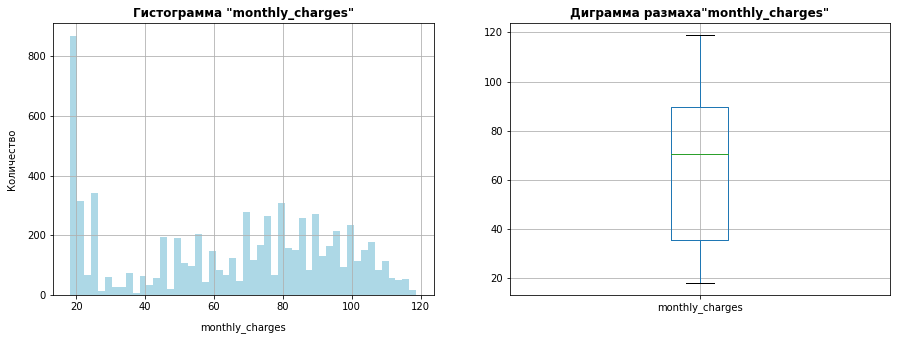

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64

In [32]:
quan_graphs(contract_new, 'monthly_charges')

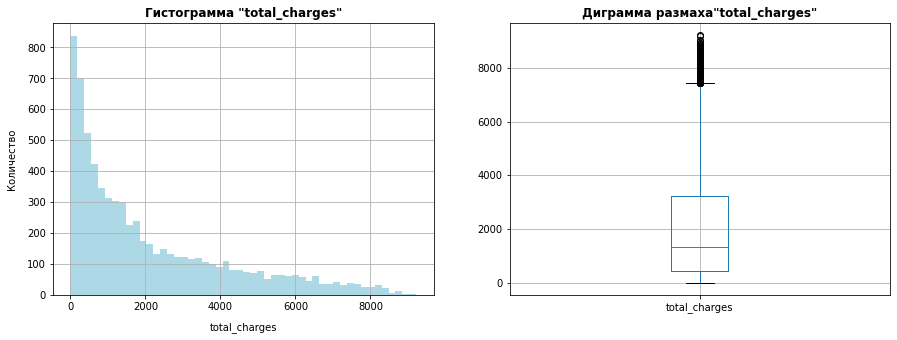

count    7043.000000
mean     2115.312885
std      2112.742814
min         0.000000
25%       436.750000
50%      1343.350000
75%      3236.690000
max      9221.380000
Name: total_charges, dtype: float64

In [33]:
quan_graphs(contract_new, 'total_charges')

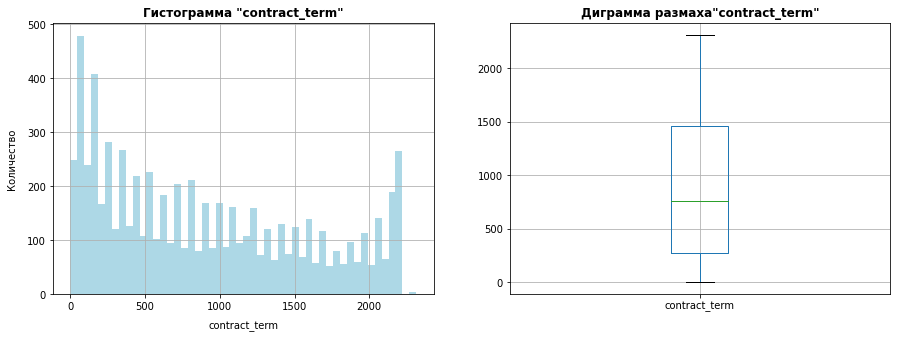

count    7043.000000
mean      898.555729
std       683.130510
min         0.000000
25%       276.000000
50%       761.000000
75%      1461.000000
max      2314.000000
Name: contract_term, dtype: float64

In [34]:
quan_graphs(contract_new, 'contract_term')

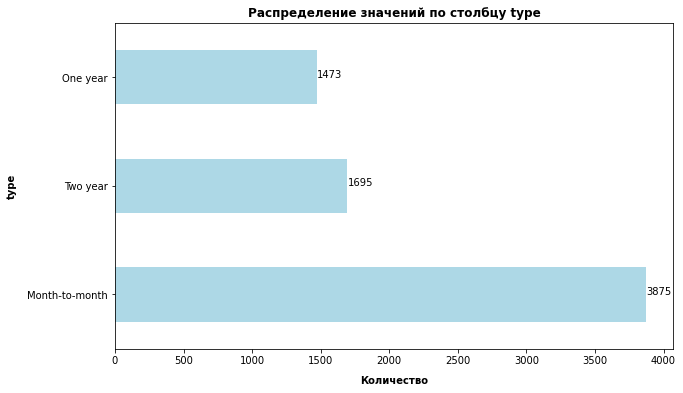

In [35]:
сat_graphs(contract_new, 'type')

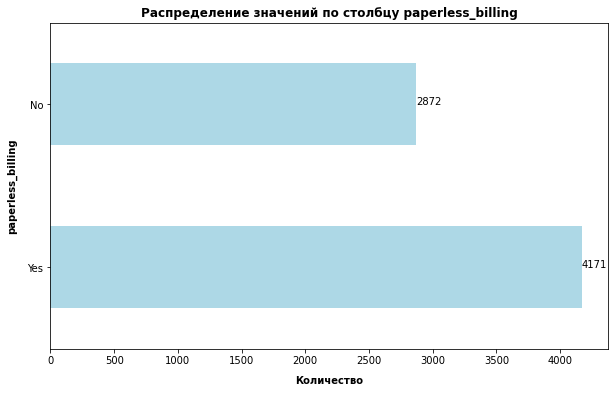

In [36]:
сat_graphs(contract_new, 'paperless_billing')

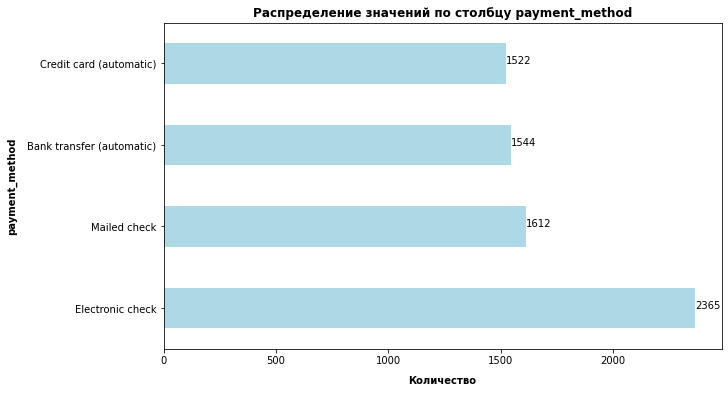

In [37]:
сat_graphs(contract_new, 'payment_method')

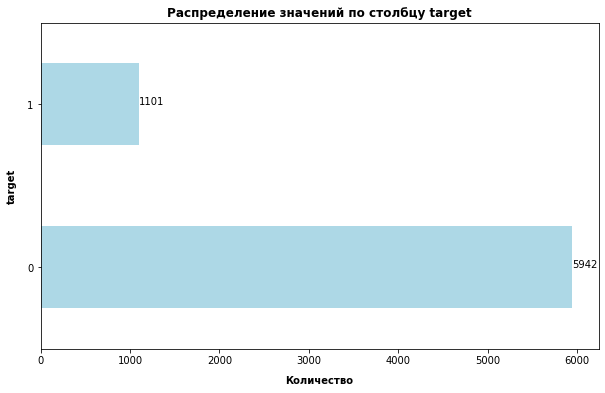

In [38]:
сat_graphs(contract_new, 'target')

`contract_new` — информация о договоре:

- Больше всего абонентов осуществляющих платежи помесячно - 3875. Платящих ежегодно - 1473, а раз в 2 года - 1695 абонентов.
- Абонентов имеющих электронный расчётный лист - 4171, не имеющих - 2872;
- Тип платежа: чуть больше абонентов выбирают электронный платежку - 2365, остальные типы поделили позиции, примерно, поровну - автоматическая оплата кредитной картой - 1522, автоматичемский банковский перевод - 1544, платежка на почту -1612 абонентов.
- Средние расходы за месяц составлят 64 ¤*, Минимальная оплата составляет 18.25 ¤, а максимальная сумма 89,85 ¤. Можно заметить, что значительное количество абонентов "сидит" на минимальном платеже - более 800 человек из предложенной выборки.
- Общие расходы абонента смещены влево, средние расходы - 2115.31 ¤, а медианное значение составляет 1343.35 ¤. Это вполне объяснимо, так как абоненты хотят получать необходимый уровень услуги за меньшие деньги.
- Средний срок действия договора  898.56 дней, что близко к медианному 761 день, но есть некоторый пик слева, но можно заметить и увеличение количества абонентов с близким к максимальному сроку, который составляет 2314 дней
- Количество абонентов расторгнувших договор составляет 1101 из 7043 абонентов.

_* использовал знак ¤ - символ валюты

**personal_new — персональные данные клиента**

In [39]:
personal_new.head()

,gender,senior_citizen,partner,dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No


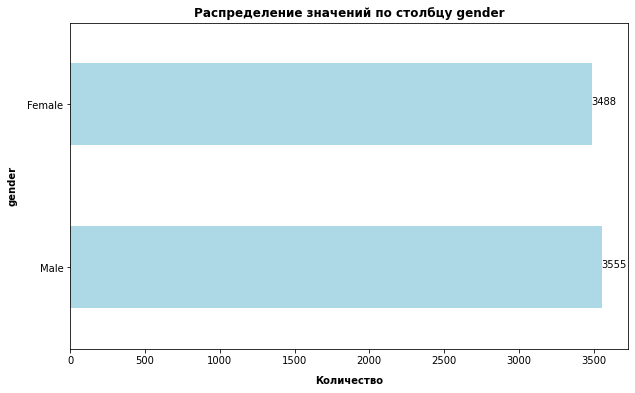

In [40]:
сat_graphs(personal_new, 'gender')

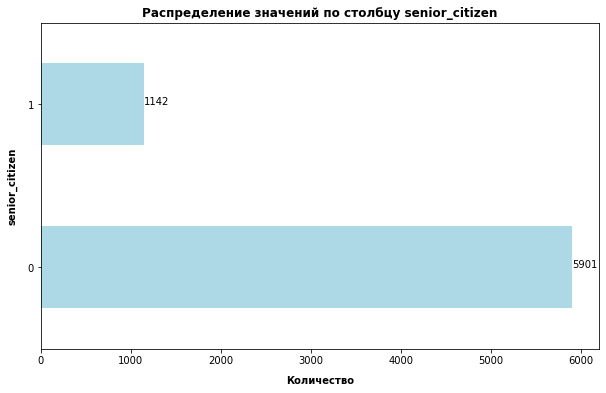

In [41]:
сat_graphs(personal_new, 'senior_citizen')

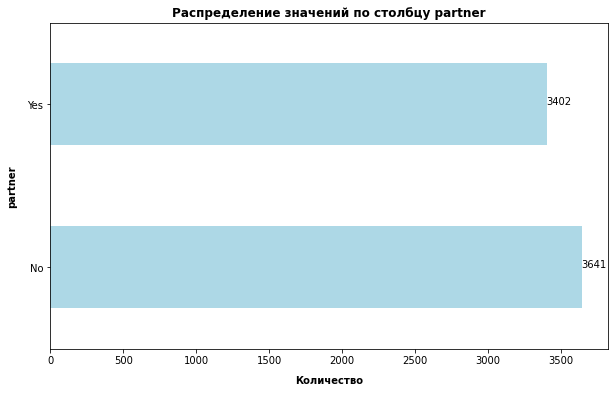

In [42]:
сat_graphs(personal_new, 'partner')

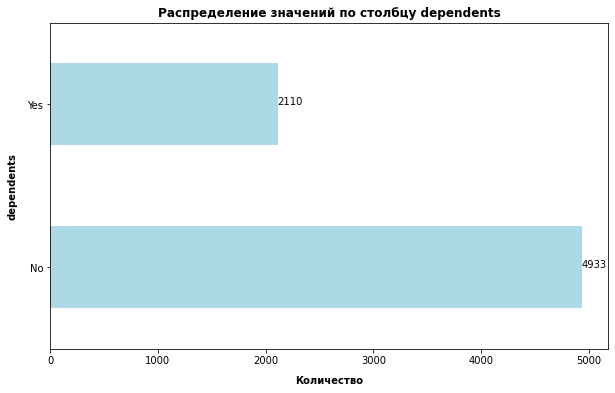

In [43]:
сat_graphs(personal_new, 'dependents')

personal_new — персональные данные клиента:

- Выборка по гендеру абонентов разделилась по полам;
- Пенсионеров в выборке 1142 из 7043 абонентов;
- Почти у половины абонентов есть партнер;
- Количество абонентов не имеющих детей в два раза больше абонентов, у которых есть дети на обеспечении.

**internet_new — информация об интернет-услугах**

In [44]:
internet_new.head()

,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies
customerID,,,,,,,
7590-VHVEG,DSL,No,Yes,No,No,No,No
5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Fiber optic,No,No,No,No,No,No


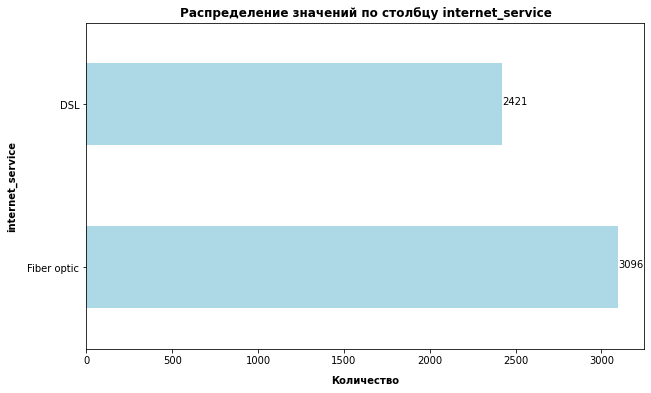

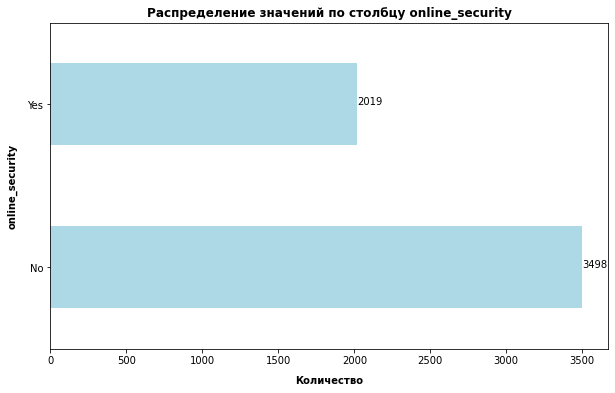

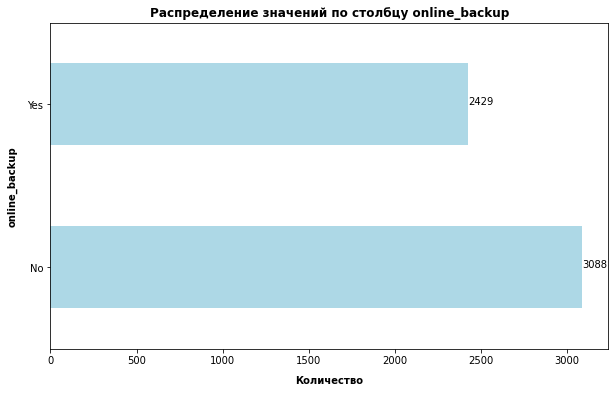

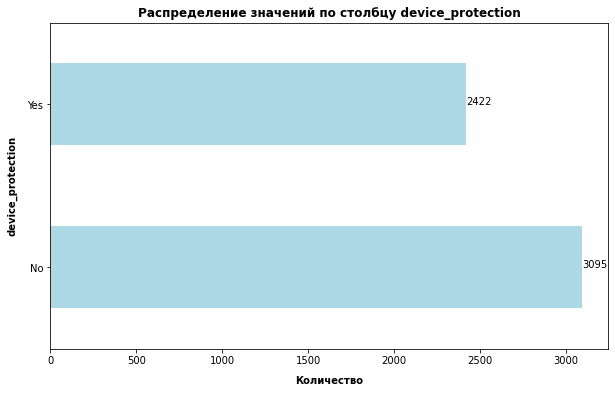

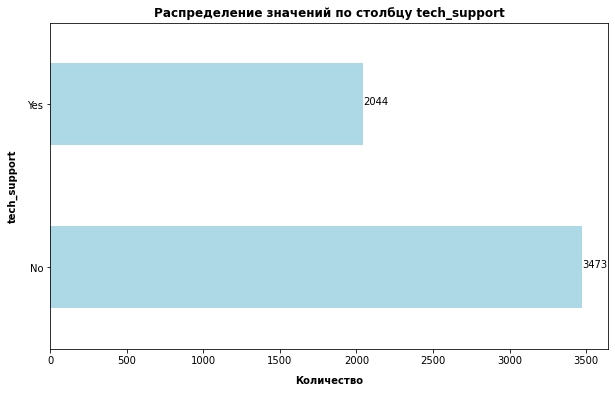

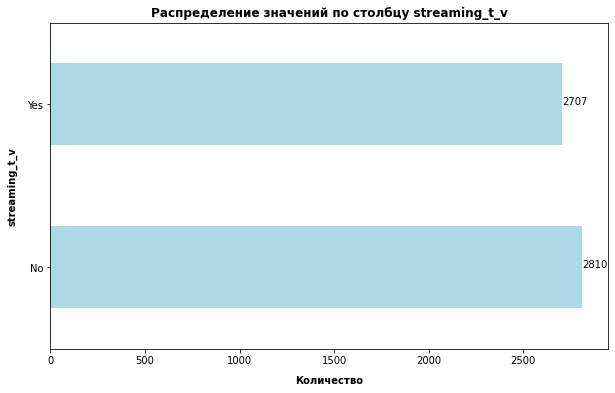

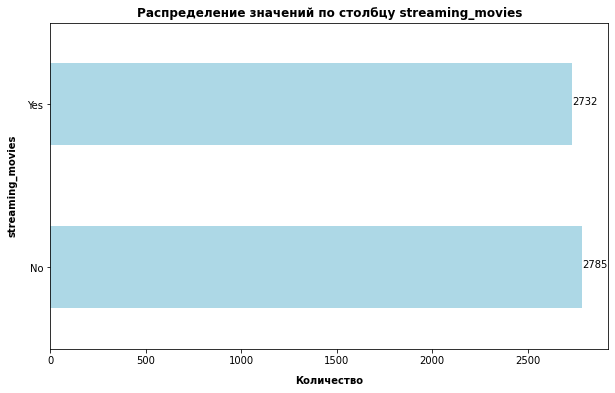

In [45]:
for i in internet_new.columns:
    if internet_new[i].dtype == 'object':
        сat_graphs(internet_new, i)

internet_new — информация об интернет-услугах. Датасете представлена информация о 5517 абонентах:

- тип подключения: подключены по оптике 3096, а по DSL 2421 абонент;
- Блокировка опасных сайтов подключена у 2019 абонентов;
- Облачное хранилище файлов для резервного копирования данных подключили - 2429 абонентов;
- Антивирус подключили - 2422 абонента;
- Выделенную линию технической поддержки выбрали 2044 абонента;
- Стриминговое телевидение выбрало около половины абонетов - 2707;
- Каталог фильмов также подключило около половины абонентов - 2810. 

**phone_new — информация об услугах телефонии**

In [46]:
phone_new.head()

,multiple_lines
customerID,
5575-GNVDE,No
3668-QPYBK,No
9237-HQITU,No
9305-CDSKC,Yes
1452-KIOVK,Yes


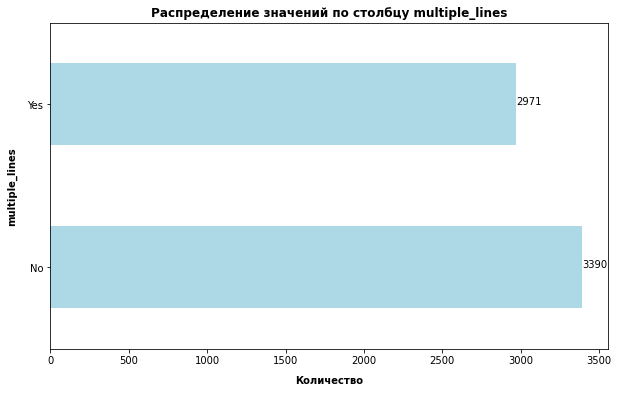

In [47]:
сat_graphs(phone_new, 'multiple_lines')

phone_new — информация об услугах телефонии:

- Подключение телефона к нескольким линиям одновременно выбрали 2971 абонент из 6361.

#### Вывод по иследовательскому анализу отдельных датафреймов

contract_new — информация о договоре:

- Больше всего абонентов осуществляющих платежи помесячно - 3875. Платящих ежегодно - 1473, а раз в 2 года - 1695 абонентов.
- Абонентов имеющих электронный расчётный лист - 4171, не имеющих - 2872;
- Тип платежа: чуть больше абонентов выбирают электронный платежку - 2365, остальные типы поделили позиции, примерно, поровну - автоматическая оплата кредитной картой - 1522, автоматичемский банковский перевод - 1544, платежка на почту -1612 абонентов.
- Средние расходы за месяц составлят 64 ¤*, Минимальная оплата составляет 18.25 ¤, а максимальная сумма 89,85 ¤. Можно заметить, что значительное количество абонентов "сидит" на минимальном платеже - более 800 человек из предложенной выборки.
- Общие расходы абонента смещены влево, средние расходы - 2115.31 ¤, а медианное значение составляет 1343.35 ¤. Это вполне объяснимо, так как абоненты хотят получать необходимый уровень услуги за меньшие деньги.
- Средний срок действия договора  898.56 дней, что близко к медианному 761 день, но есть некоторый пик слева, но можно заметить и увеличение количества абонентов с близким к максимальному сроку, который составляет 2314 дней
- Количество абонентов расторгнувших договор составляет 1101 из 7043 абонентов.

_* использовал знак ¤ - символ валюты


personal_new — персональные данные клиента:

- Выборка по гендеру абонентов разделилась по полам;
- Пенсионеров в выборке 1142 из 7043 абонентов;
- Почти у половины абонентов есть партнер;
- Количество абонентов не имеющих детей в два раза больше абонентов, у которых есть дети на обеспечении.


internet_new — информация об интернет-услугах. Датасете представлена информация о 5517 абонентах:

- тип подключения: подключены по оптике 3096, а по DSL 2421 абонент;
- Блокировка опасных сайтов подключена у 2019 абонентов;
- Облачное хранилище файлов для резервного копирования данных подключили - 2429 абонентов;
- Антивирус подключили - 2422 абонента;
- Выделенную линию технической поддержки выбрали 2044 абонента;
- Стриминговое телевидение выбрало около половины абонетов - 2707;
- Каталог фильмов также подключило около половины абонентов - 2810.


phone_new — информация об услугах телефонии:

- Подключение телефона к нескольким линиям одновременно выбрали 2971 абонент из 6361.


Признаки `begin_date` и `end_date` в датасете `contract_new` не прегодятся нам так как у нас задача классификации, а не задача иследования временных рядов и даты будут мешать качеству модели.

## Объединение данных

Объеденим данные в один датасет

In [48]:
full_df = contract_new.merge(personal_new, how='left', on='customerID')
full_df = full_df.merge(internet_new, how='left', on='customerID')
full_df = full_df.merge(phone_new, how='left', on='customerID')

In [49]:
full_df.head()

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,target,contract_term,gender,...,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,...,No,No,Fiber optic,No,No,No,No,No,No,No


Удалим признаки `begin_date` и `end_date`

In [50]:
full_df = full_df.drop(['begin_date', 'end_date'], axis=1)

In [51]:
full_df.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,target,contract_term,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


Посмотрим на объединенные данные

In [52]:
get_data_info(full_df)

,type,paperless_billing,payment_method,monthly_charges,total_charges,target,contract_term,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   total_charges      7043 non-null   float64
 5   target             7043 non-null   int64  
 6   contract_term      7043 non-null   int64  
 7   gender             7043 non-null   object 
 8   senior_citizen     7043 non-null   int64  
 9   partner            7043 non-null   object 
 10  dependents         7043 non-null   object 
 11  internet_service   5517 non-null   object 
 12  online_security    5517 non-null   object 
 13  online_backup      5517 non-null   object 
 14  device_protection  5517 non-null   object 
 15  tech_support       5517 non-null   object 
 16  streaming_t_v 

None

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
total_charges,7043.0,2115.312885,2112.742814,0.00,436.75,1343.35,3236.69,9221.38
target,7043.0,0.156325,0.363189,0.00,0.00,0.00,0.00,1.00
contract_term,7043.0,898.555729,683.130510,0.00,276.00,761.00,1461.00,2314.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00


type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
target                  0
contract_term           0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_t_v        1526
streaming_movies     1526
multiple_lines        682
dtype: int64

4

Датафрейм `full_df`:

- Cодержит 7043 строки;
- Пропуски присутствуют в столбцах:
    - internet_service:    1526
    - online_security:      1526
    - online_backup:        1526
    - device_protection:    1526
    - tech_support:         1526
    - streaming_t_v:        1526
    - streaming_movies:     1526
    - multiple_lines:        682
- Дубликатов - 4.

Необходимо обработать пропуски и дубликаты

rows_index = (full_df['internet_service'] == 'no_package') and (full_df['multiple_lines'] == 'no_package')
full_df.loc[rows_index]

In [53]:
rows_index = full_df['internet_service'].isna() & (full_df['multiple_lines'] == 'No')
full_df.loc[rows_index, ['internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support',\
                         'streaming_t_v', 'streaming_movies']] = 'no_package'

In [54]:
rows_index = full_df['internet_service'].isna() & (full_df['multiple_lines'] == 'Yes')
full_df.loc[rows_index, ['internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support',\
                         'streaming_t_v', 'streaming_movies']] = 'No'

In [55]:
rows_index = (full_df['internet_service'] != 'No') & (full_df['multiple_lines'].isna())
full_df.loc[rows_index, 'multiple_lines'] = 'No'

In [56]:
full_df.isna().sum()

type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
target               0
contract_term        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_t_v        0
streaming_movies     0
multiple_lines       0
dtype: int64

Удалим дубликаты

In [57]:
full_df = full_df.drop_duplicates()

In [58]:
full_df.duplicated().sum()

0

In [59]:
full_df.shape

(7039, 19)

senior_citizen - это категориальный признак и мы приведем его к типу object

In [60]:
full_df['senior_citizen'] = full_df['senior_citizen'].astype(object)

### Вывод по объединению данных

- Объеденили данный в один датасет `full_df`;
- Удалили признаки begin_date и end_date;
- Обработали пропуски присутствуют в столбцах:
    - internet_service:    1526
    - online_security:      1526
    - online_backup:        1526
    - device_protection:    1526
    - tech_support:         1526
    - streaming_t_v:        1526
    - streaming_movies:     1526
    - multiple_lines:        682
- Удалили дубликаты - 4 строки;
- Итоговый датасет имеет размер 7039 строк, 19 столбцов;
- senior_citizen - это категориальный признак и мы привели его к типу object.

## Исследовательский анализ и предобработка данных объединённого датафрейма

### Исследовательский анализ

In [61]:
full_df.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,target,contract_term,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No
5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


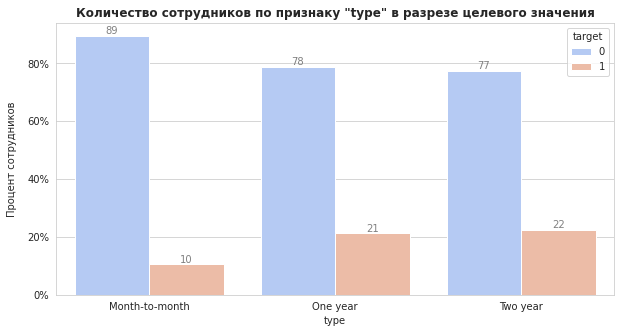

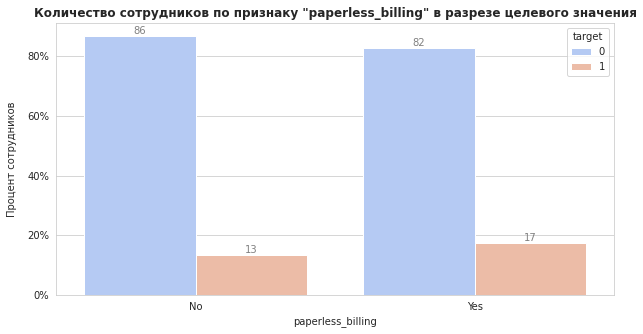

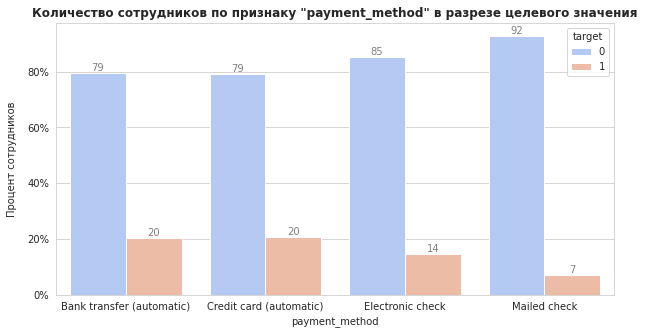

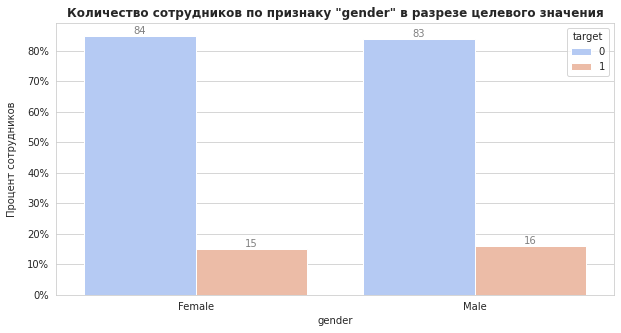

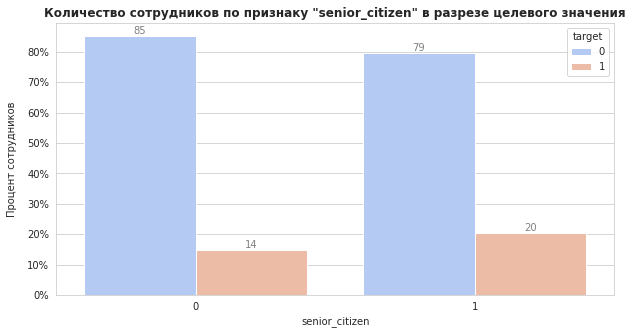

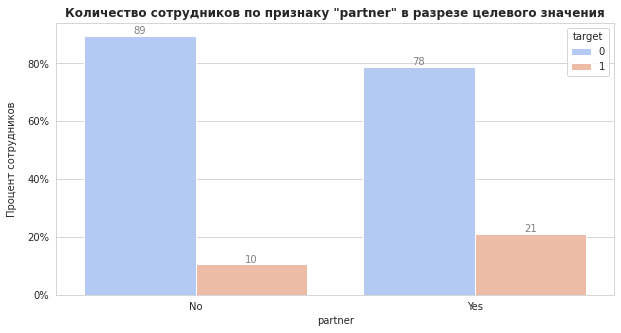

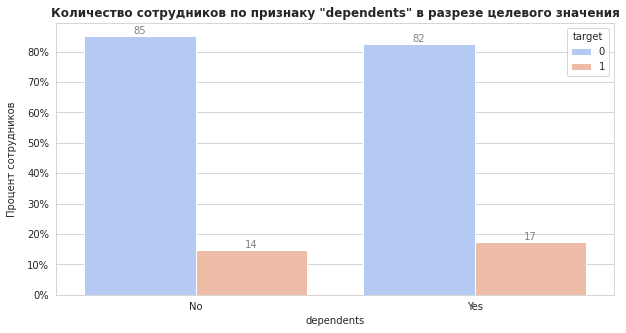

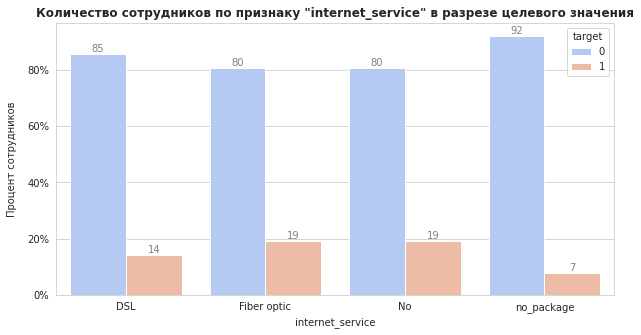

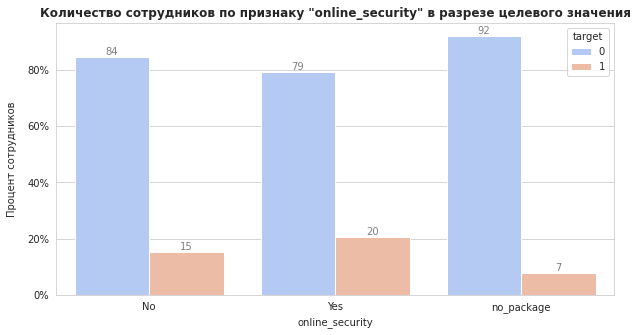

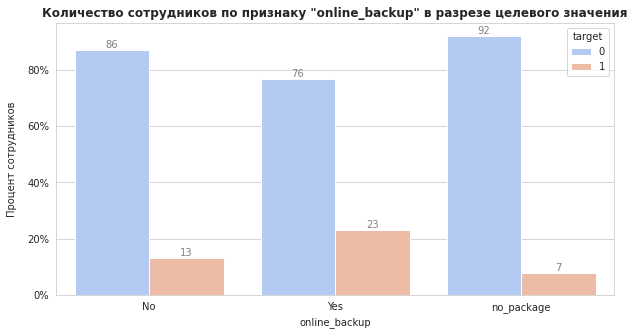

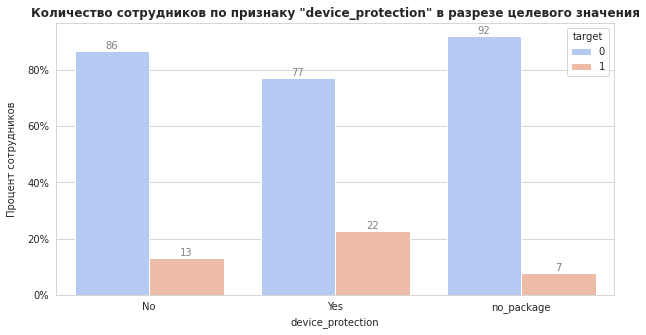

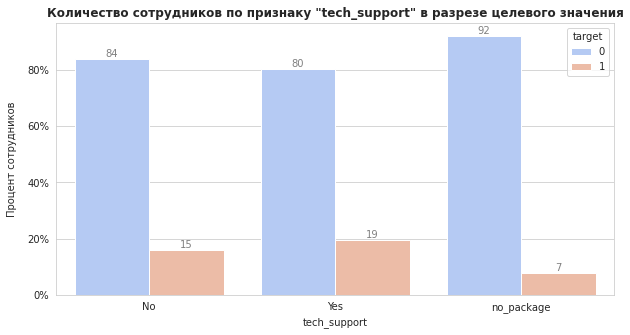

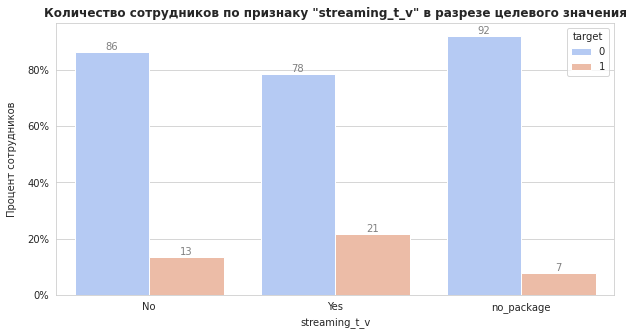

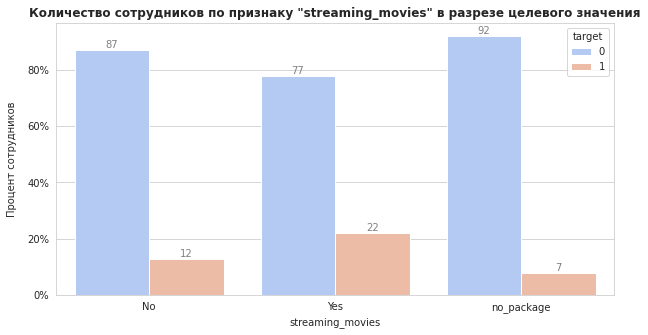

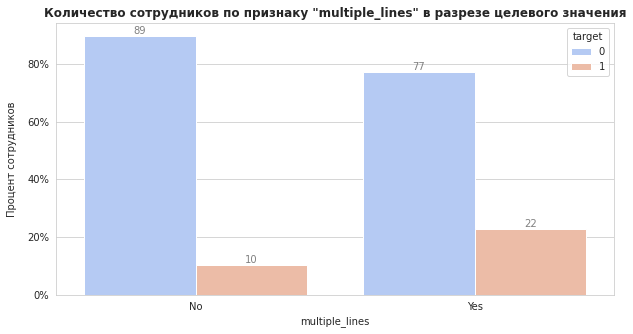

In [62]:
for i in full_df.columns:
    if full_df[i].dtype == 'object':
         сat_graphs_target(full_df, i, 'target')

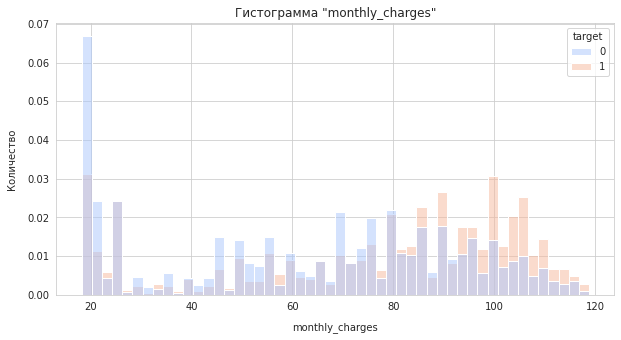

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,5938.0,62.775514,29.832827,18.25,30.10,69.225,87.2375,118.60
1,1101.0,75.546004,29.116213,18.40,56.15,84.200,99.5000,118.75


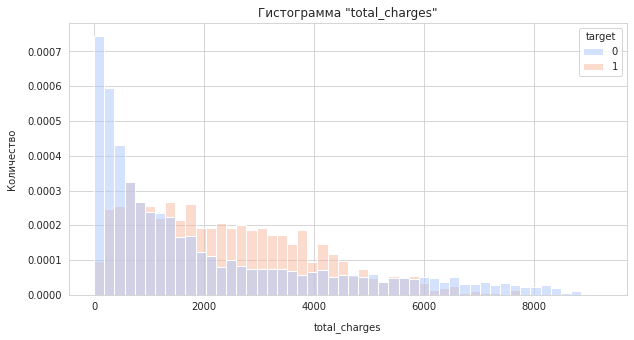

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,5938.0,2067.561783,2192.864168,0.00,374.6475,1192.80,3173.8375,9221.38
1,1101.0,2371.377275,1581.862275,77.84,1048.0500,2139.03,3404.9100,7649.76


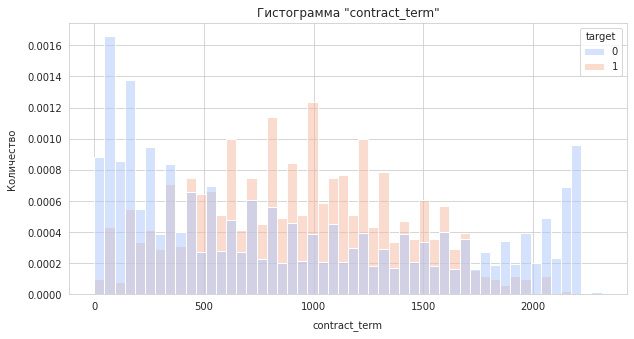

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,5938.0,893.534692,716.629748,0.0,245.0,702.0,1523.0,2314.0
1,1101.0,924.863760,458.771309,28.0,577.0,915.0,1249.0,2129.0


In [63]:
for i in full_df.columns:
    if full_df[i].dtype != 'object' and i != 'target':
         quan_graphs_target(full_df, i, 'target')

#### Вывод по исследовательскому анализу

- Доля абонентов отказавшихся от услуг, платящих помесячно ниже в два раза (10%), чем у платящих сразу за год (21%) и два (22%).
- Доля абонентов отказавшихся от услуг, которые получают счет на оплату по почте значительно ниже (7%), чем у других способов оплаты - при автоматических списанияъ 20%, по электронному счету 14%. Возможно агресивные действия направленные на подведение к автоматической оплате. Например, коммисия при платежах без подписки.
- Пенсионеры отказываются от услуг на 6% больше, чем у не пенсионеры.
- Доля отказавшихся от услуг среди имеющих партнера в два раз выше, чему не имеющих и составляет 21%;
- По дополнительным услугам доля отказов среди подключивших антивирусную защиту (22%), облачное хранилище (23%), услугу телевидения (21%), каталог фильмов (22%) примерно в два раза выше чем у не подключивших. Возможно, стоит обратить внимание на качество услуг или на качество продаж, так как предполагаю абонентам подключают услуги, которые им не нужны;
- Доля абонентов расторгнувших договор среди имеющих большой срок договора ниже.

### Корреляционный анализ

In [64]:
full_df.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,target,contract_term,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No
5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [65]:
interval_cols = ['monthly_charges', 
                 'total_charges', 
                 'contract_term']

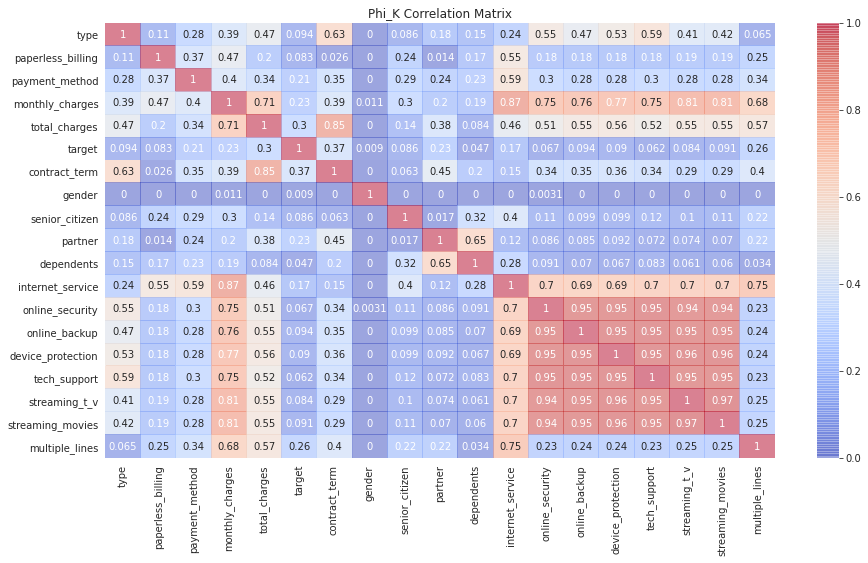

In [66]:
corr_matrix = full_df.phik_matrix(interval_cols=interval_cols)

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', alpha=0.5)
plt.title('Phi_K Correlation Matrix')
plt.show()

- Признак `gender` не влияет на корреляцию. Удалим его.

In [67]:
full_df = full_df.drop(['gender'], axis=1)

In [68]:
full_df.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,target,contract_term,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,0,Yes,No,DSL,No,Yes,No,No,No,No,No
5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,0,No,No,Fiber optic,No,No,No,No,No,No,No


Есть мультиколлинеарность между категориальными признаками относящимся к сервиcам. Попробуем объединить в один признак.

In [69]:
def services(row):
    
    services = []
    
    if row['online_security'] == 'Yes':
        services.append('security')
    if row['online_backup'] == 'Yes':
        services.append('backup')
    if row['device_protection'] == 'Yes':
        services.append('protection')
    if row['tech_support'] == 'Yes':
        services.append('support')
    if row['streaming_t_v'] == 'Yes':
        services.append('tv')
    if row['streaming_movies'] == 'Yes':
        services.append('movies')
    return '_'.join(services) if services else 'No'

In [70]:
columns_services = ['online_security', 'online_backup', 'device_protection', 
                                 'tech_support', 'streaming_t_v', 'streaming_movies']

In [71]:
full_df['services'] = full_df.apply(services, axis=1)

In [72]:
full_df.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,target,contract_term,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines,services
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,0,Yes,No,DSL,No,Yes,No,No,No,No,No,backup
5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,0,No,No,DSL,Yes,No,Yes,No,No,No,No,security_protection
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,0,No,No,DSL,Yes,Yes,No,No,No,No,No,security_backup
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,security_protection_support
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,0,No,No,Fiber optic,No,No,No,No,No,No,No,No


In [73]:
full_df = full_df.drop(columns=columns_services, axis=1)

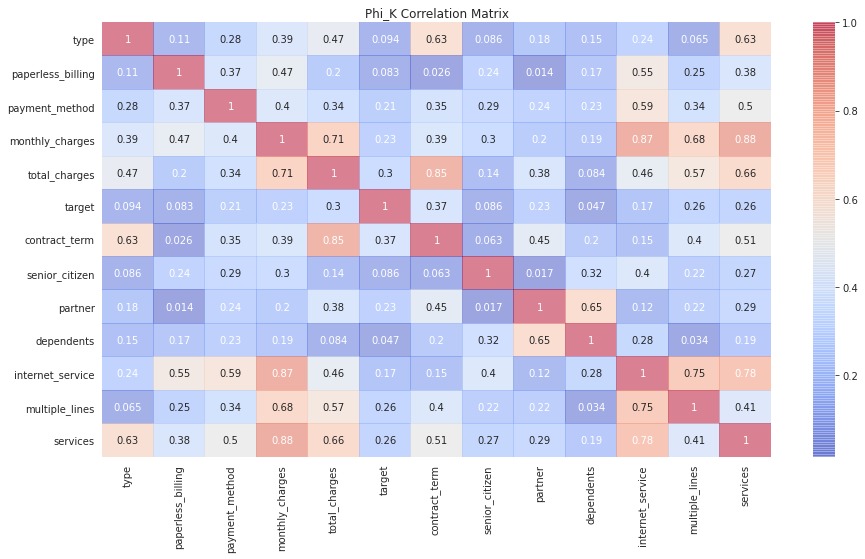

In [74]:
corr_matrix = full_df.phik_matrix(interval_cols=interval_cols)

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', alpha=0.5)
plt.title('Phi_K Correlation Matrix')
plt.show()

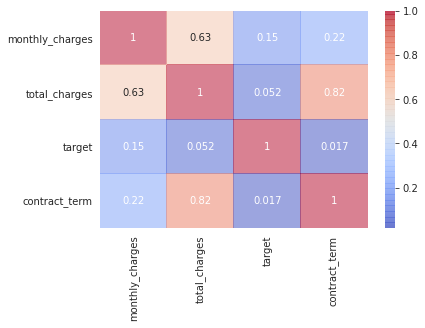

In [75]:
sns.heatmap(full_df.corr(), annot=True, cmap='coolwarm', alpha=0.5)
plt.show()

Присутствует заметная корреляция между monthly_charges и	total_charges, а также между total_charges и contract_term. Так как зависимость целевого признака с ниже total_charges, его удадим

In [76]:
full_df = full_df.drop(['total_charges'], axis=1)

Мультиколлиарность отсутствует

#### Вывод по корреляционому анализу

- Многие признаки имеют слабую связь с целевым;
- Признак `gender` не влияет на корреляцию. Удалили его;
- Также у нас два признака оплаты - ежемесечное начисление и общая сумма полученная от абонента. Второй признак более важный так как показывает сколько мы заработали с клиента, соответственно первый удалили;
- С целевым признаком наибольше коррелируют признаки:
    - payment_method,
    - monthly_charges,
    - total_charges, 
    - contract_term, 
    - partner;
- Высокая корреляция между признаками интернет-услуг. Объединили в один признак - services;
- Присутствует заметная корреляция между monthly_charges и	total_charges, а также между total_charges и contract_term. Так как зависимость целевого признака с ниже total_charges, его удалили.

## Подготовка данных

In [77]:
# Разделение данных на признаки и целевую переменную
X = full_df.drop(['target'], axis=1)
y = full_df['target']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y)

In [78]:
X_train.shape

(5279, 11)

In [79]:
X_test.shape

(1760, 11)

### Вывод по подготовке данных

- Разделили данные на две выборки в соотношении 3:1, используя пропорцию классов при разделении на обучающую и тестовую выборки с помощью параметра stratify функции train_test_split в соответствии распределению классов в целевом признаке.

## Обучение моделей машинного обучения

In [80]:
X_train.head()

,type,paperless_billing,payment_method,monthly_charges,contract_term,senior_citizen,partner,dependents,internet_service,multiple_lines,services
customerID,,,,,,,,,,,
6384-VMJHP,Two year,Yes,Credit card (automatic),73.00,2191,0,No,No,DSL,No,security_backup_protection_support_movies
2507-QZPQS,Month-to-month,No,Electronic check,95.70,457,0,No,No,Fiber optic,Yes,backup_support_movies
5923-GXUOC,Month-to-month,Yes,Electronic check,104.40,396,0,No,No,Fiber optic,No,security_backup_protection_tv_movies
2927-QRRQV,One year,Yes,Electronic check,94.65,1401,0,Yes,No,Fiber optic,Yes,backup_protection_tv
4868-AADLV,One year,Yes,Electronic check,116.25,2010,1,Yes,Yes,Fiber optic,Yes,security_backup_protection_support_tv_movies


In [81]:
ohe_columns = ['paperless_billing', 'senior_citizen', 'partner', 'dependents', 'internet_service', 'internet_service', 
               'multiple_lines', 'type', 'payment_method', 'services']
ord_columns = []

In [82]:
num_columns = list(X_train.select_dtypes(include=[np.number]).columns.values)

num_columns

['monthly_charges', 'contract_term']

In [83]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

In [84]:
# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    #['Month-to-month', 'One year', 'Two year'],
                    #['Mailed check', 'Electronic check', 'Bank transfer (automatic)', 'Credit card (automatic)']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [85]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [86]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [87]:
param_grid = [
        
    # словарь для CatBoostClassifier()
    
    {
        'models' : [CatBoostClassifier(random_state=RANDOM_STATE, verbose=False)],
        'models__depth': range(2, 17),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    },
        
        # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 15),
        'models__max_features': range(2, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel='poly', probability=True)],
        'models__degree': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
    
]

In [88]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [89]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['paperless_billing',
                                                                                'senior_citizen',
                                                                                'partner',
                                                                                'dependents',...
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=231224,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(kernel='poly',
                                                        probability=True,
                                                        random_state=231224)],
                                         'models__degree': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=231224, scoring='roc_auc')

In [90]:
randomized_search.best_score_

0.8426516514015396

In [91]:
models = pd.DataFrame(randomized_search.cv_results_).sort_values(by='rank_test_score')
models['param_models_str'] = models['param_models'].astype(str)
best_models = models.groupby('param_models_str').first()
best_models

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_models__max_features,param_models__max_depth,param_models,param_models__C,param_models__depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
param_models_str,,,,,,,,,,,,,,,,,,,
<catboost.core.CatBoostClassifier object at 0x7f7bbdb846d0>,77.995376,0.513102,0.035868,0.000382,passthrough,NaN,NaN,<catboost.core.CatBoostClassifier object at 0x...,NaN,12.0,"{'preprocessor__num': 'passthrough', 'models__...",0.844104,0.854661,0.864055,0.833325,0.817113,0.842652,0.016393,1
DecisionTreeClassifier(random_state=231224),0.058293,0.051674,0.011478,0.000233,StandardScaler(),10.0,3.0,DecisionTreeClassifier(random_state=231224),NaN,NaN,"{'preprocessor__num': StandardScaler(), 'model...",0.730031,0.724011,0.686998,0.735911,0.669608,0.709312,0.026181,3
"LogisticRegression(penalty='l1', random_state=231224, solver='liblinear')",0.166530,0.058437,0.012981,0.000138,StandardScaler(),NaN,NaN,"LogisticRegression(penalty='l1', random_state=...",2.0,NaN,"{'preprocessor__num': StandardScaler(), 'model...",0.757936,0.747971,0.763011,0.735914,0.731188,0.747204,0.012244,2


In [92]:
y_test_pred = randomized_search.predict_proba(X_test) 
display(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred[:, 1])}')

'Метрика ROC-AUC на тестовой выборке: 0.8700312213039485'

In [93]:
display(f'Лучшая модель: {randomized_search.best_estimator_["models"]}')

'Лучшая модель: <catboost.core.CatBoostClassifier object at 0x7f7bbdbacdc0>'

In [94]:
y_test_pred_classes = randomized_search.predict(X_test)
display(f'Метрика Accuracy на тестовой выборке: {accuracy_score(y_test, y_test_pred_classes)}')

'Метрика Accuracy на тестовой выборке: 0.8778409090909091'

Accuracy показывает долю правильно классифицированных абонентов, как ушедших, так и оставшихся от общего числа. То есть, наша 87% случаев предсказывает верно.

'accuracy : 0.8778409090909091'

'precision: 0.7419354838709677'

'recall: 0.33454545454545453'

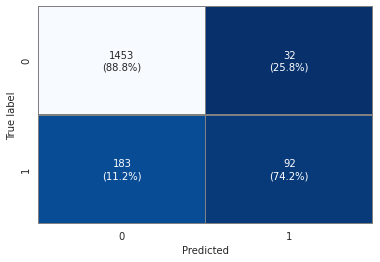

In [95]:
metrics_logistic(y_test, y_test_pred_classes)

- 0:0 - верно предсказано, что абонент не уйдет в 87.8% случаев по предсказанному классу;
- 0:1 - модель предсказала, что абонент не уйдет, а он ушел в 12,2% в по предсказанному классу;
- 1:0 - в 33,3% модель ошиблась предсказав что абонент не уйдет, а он ушел;
- 1:1 - модель верно предсказала, что абонент расторгнет договор.

### Вывод по обучению моделей

- Метрика ROC-AUC на тестовой выборке: 0.856, что соответствует тех заданию;
- Лучшая модель: CatBoostClassifier (градиентный бустинг для классификации);
- Метрика Accuracy на тестовой выборке: 0.87
- Нас интересует удержание клиентов
    - модель правильно предсказала что абонент расторгнет договор (True Positive (TP)) в 76 случаях;
    - а False Negative (FN) - 23, неправильно классифицированные абоненты, расторгнувшие договор. Модель предсказала, что они не покинут компанию.
- Precision показывает долю правильных предсказаний абонентов расторгнувших договор -  0.76;
- Recall показывает долю правильных предсказаний расторжения договора, которые действительно расторгнули;

Если удержание клиента дешевле, чем его потеря, то следует повышать Recall. Но тут надо смотреть, возможно какие-то абонентские бонусы дороги для компании, но компания будет вкладывать в более точный прогноз уходящих клиентов и тогда высокий Precision означает, что модель редко ошибается, когда предсказывает уход и тогда стоит обратить внимание на эту метрику. Но все-таки в данном случае склоняюсь, что FN, ошибки 2 рода, важнее, когд модель ошибочно предсказала, что абоненты остануться, а они ушли.

## Анализ важности признаков

In [96]:
preprocessor = randomized_search.best_estimator_['preprocessor'] # лучшая предобработка
best_model = randomized_search.best_estimator_.named_steps['models'] # лучшая модель

In [97]:
# Получаем имена столобцов, которые будет после предобрабоки
ohe_feature_names = preprocessor.named_transformers_['ohe'].get_feature_names_out(input_features=ohe_columns)
#ord_feature_names = preprocessor.named_transformers_['ord'].get_feature_names_out(input_features=ord_columns)
num_feature_names = preprocessor.named_transformers_['num'].get_feature_names_out(input_features=num_columns)

# объединяем полученные имена столбцов
#all_feature_names = np.concatenate([ohe_feature_names, ord_feature_names, num_feature_names])
all_feature_names = np.concatenate([ohe_feature_names, num_feature_names])

In [98]:
X_test_new = preprocessor.transform(X_test)
X_test_new = pd.DataFrame(X_test_new, columns=all_feature_names)

In [99]:
X_train_new = preprocessor.transform(X_train)
X_train_new = pd.DataFrame(X_train_new, columns=all_feature_names)

  0%|          | 0/20 [00:00<?, ?it/s]

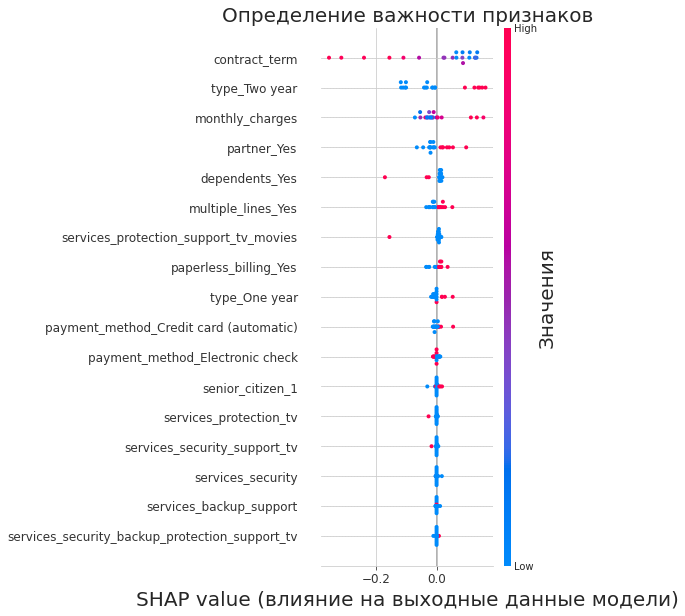

In [100]:
X_test_new_smp = shap.sample(X_test_new, 20)

explainer = shap.KernelExplainer(best_model.predict, X_test_new_smp)
shap_values = explainer(X_test_new_smp)

shap.summary_plot(shap_values, X_test_new_smp, show=False, max_display=17)


fig, ax = plt.gcf(), plt.gca()

ax.tick_params(labelsize=12)
ax.set_xlabel("SHAP value (влияние на выходные данные модели)", fontsize=20)
ax.set_title('Определение важности признаков', fontsize=20)

cb_ax = fig.axes[1] 

cb_ax.tick_params(labelsize=10)
cb_ax.set_ylabel("Значения", fontsize=20)

plt.show()

Как читать график:

Значения слева от центральной вертикальной линии — это класс 0 (контракт действует), справа - 1 (расторгнут). Чем толще линия на графике, тем больше таких точек наблюдения. Чем краснее точки на графике, тем выше значения фичи в ней

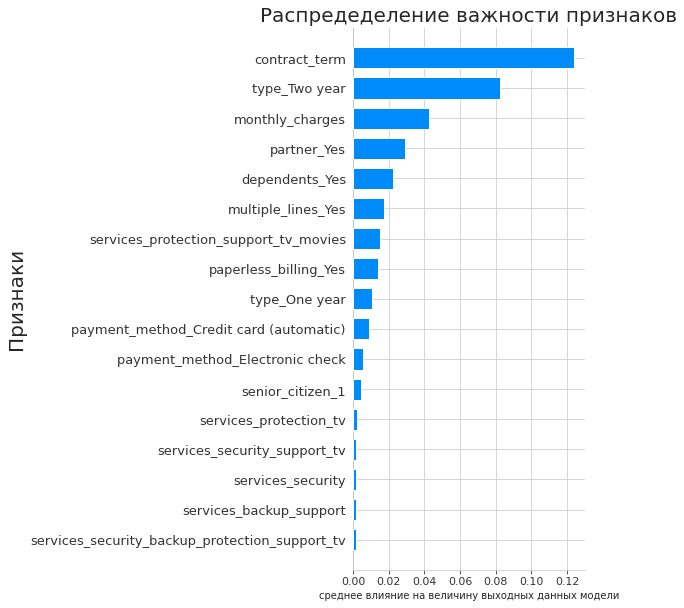

In [101]:
shap.summary_plot(shap_values, plot_type='bar', max_display=17, show=False,)

# Get the current figure and axes objects. from @GarrettCGraham code
fig, ax = plt.gcf(), plt.gca()
ax.set_title('Распредеделение важности признаков', fontsize=20)
ax.set_xlabel("среднее влияние на величину выходных данных модели", fontsize=10)
ax.set_ylabel("Признаки", fontsize=20)
plt.show()

### Вывод по важности признаков

Наибольшее влияние на целевой признак оказывали следующие переменные:
- Общий срок рдоговора клиента (contract_term);
- Тип оплаты: раз в год-два или ежемесячно (type);
- Подключенная опции "облачное хранилище файлов для резервного копирования данных" (online_backup_yes).
- Наличие партнера (partner);
- Подключены многоканальный телефон (multiple_lines_yes).

## Вывод

**Вывод по загруженным данным**

Загрузили данные, сделав поле `customerID` индексным.

Датафрейм `contract_new`:
- Описание столбцов соответствует содержимому;
- Типы данных:
    - `BeginDate` и `EndDate` необходимо перевести в формат даты после выделения целевого признака. В `EndDate` за место значения `No` поставим  2020-02-01, так как информация о договорах актуальна на 1 февраля 2020 года.
    - `TotalCharges` необходимо перевести в вещественный тип;
- Общее описание данных не вызывает вопросов;
- Cодержит 7043 строки;
- Пропуски отсутствуют;
- Количество дубликатов - 37. Пока не удаляем и проверим дубликаты после объеденения датафреймов;
- Наименования столбцов необходимо привести к змеинному регистру;
- Из `EndDate` требуется выделить целевой признак, если в значении дата - договор расторгнут, если `No` - договор действует;
- Добавим признак `срок действия договора` для анализа и возможно для построения модели.


Датафрейм `personal_new`:
- Описание столбцов соответствует содержимому;
- Типы данных:
    - `SeniorCitizen` - приведем к типу объект, так как это категориальный признак;
- Общее описание данных не вызывает вопросов;
- Cодержит 7043 строки;
- Пропуски отсутствуют;
- Дубликатов - 7027. Пока не удаляем и проверим дубликаты после объеденения датафреймов;
- Наименования столбцов необходимо привести к змеинному регистру.


Датафрейм `internet_new`:
- Описание столбцов соответствует содержимому;
- Типы данных соответствуют содержимому;
- Общее описание данных не вызывает вопросов;
- Cодержит 5517 строк. Соответственно, данные не по всем клиентам, указанным в `contract_new`;
- Пропуски отсутствуют;
- Дубликатов - 5389. Пока не удаляем и проверим дубликаты после объеденения датафреймов;
- Наименования столбцов необходимо привести к змеинному регистру.


Датафрейм `phone_new`:
- Описание столбцов соответствует содержимому;
- Типы данных соответствуют содержимому;
- Общее описание данных не вызывает вопросов;
- Cодержит 6361 строк. Соответственно, данные не по всем клиентам, указанным в `contract_new`;
- Пропуски отсутствуют;
- Дубликатов - 6359. Пока не удаляем и проверим дубликаты после объеденения датафреймов;
- Наименования столбцов необходимо привести к змеинному регистру.


**Обработка данных**

- Привели названия столбцов к змеиному регистру (snake_case);
- Выделили целевой признак `target` по 	`end_date`: `0` - если договор действует (`No` в `end_date`), `1` - расторгнут (стоит дата в `end_date`);
- В `end_date` за место значения `No` поставили `2020-02-01`, так как информация о договорах актуальна на 1 февраля 2020 года;
- Измененили типы данных:
    - `begin_date` и `end_date`	на дату;
    - `total_charges` на вещественный;
- Появились 11 пропусков после преобразования `total_charges` - это договора заключеные на дату среза данных и поэтому еще общие расходы абонента не подтянулись? cоответственн, поставим в место `NaN` `0`;
- Добавили признак срок действия договора для анализа и возможно для использования в построении модели - `contract_term`;
- `senior_citizen` - привели к типу объект, так как это категориальный признак.

**Иследовательский анализ отдельных датафреймов**

contract_new — информация о договоре:

- Больше всего абонентов осуществляющих платежи помесячно - 3875. Платящих ежегодно - 1473, а раз в 2 года - 1695 абонентов.
- Абонентов имеющих электронный расчётный лист - 4171, не имеющих - 2872;
- Тип платежа: чуть больше абонентов выбирают электронный платежку - 2365, остальные типы поделили позиции, примерно, поровну - автоматическая оплата кредитной картой - 1522, автоматичемский банковский перевод - 1544, платежка на почту -1612 абонентов.
- Средние расходы за месяц составлят 64 ¤*, Минимальная оплата составляет 18.25 ¤, а максимальная сумма 89,85 ¤. Можно заметить, что значительное количество абонентов "сидит" на минимальном платеже - более 800 человек из предложенной выборки.
- Общие расходы абонента смещены влево, средние расходы - 2115.31 ¤, а медианное значение составляет 1343.35 ¤. Это вполне объяснимо, так как абоненты хотят получать необходимый уровень услуги за меньшие деньги.
- Средний срок действия договора  898.56 дней, что близко к медианному 761 день, но есть некоторый пик слева, но можно заметить и увеличение количества абонентов с близким к максимальному сроку, который составляет 2314 дней
- Количество абонентов расторгнувших договор составляет 1101 из 7043 абонентов.

_* использовал знак ¤ - символ валюты


personal_new — персональные данные клиента:

- Выборка по гендеру абонентов разделилась по полам;
- Пенсионеров в выборке 1142 из 7043 абонентов;
- Почти у половины абонентов есть партнер;
- Количество абонентов не имеющих детей в два раза больше абонентов, у которых есть дети на обеспечении.


internet_new — информация об интернет-услугах. Датасете представлена информация о 5517 абонентах:

- тип подключения: подключены по оптике 3096, а по DSL 2421 абонент;
- Блокировка опасных сайтов подключена у 2019 абонентов;
- Облачное хранилище файлов для резервного копирования данных подключили - 2429 абонентов;
- Антивирус подключили - 2422 абонента;
- Выделенную линию технической поддержки выбрали 2044 абонента;
- Стриминговое телевидение выбрало около половины абонетов - 2707;
- Каталог фильмов также подключило около половины абонентов - 2810.


phone_new — информация об услугах телефонии:

- Подключение телефона к нескольким линиям одновременно выбрали 2971 абонент из 6361.


Признаки `begin_date` и `end_date` в датасете `contract_new` не прегодятся нам так как у нас задача классификации, а не задача иследования временных рядов и даты будут мешать качеству модели.

**Объединение данных**

- Объеденили данный в один датасет `full_df`;
- Удалили признаки begin_date и end_date;
- Обработали пропуски присутствуют в столбцах:
    - internet_service:    1526
    - online_security:      1526
    - online_backup:        1526
    - device_protection:    1526
    - tech_support:         1526
    - streaming_t_v:        1526
    - streaming_movies:     1526
    - multiple_lines:        682
- Удалили дубликаты - 4 строки;
- Итоговый датасет имеет размер 7039 строк, 19 столбцов.


**Исследовательский анализ**

- Доля абонентов отказавшихся от услуг, платящих помесячно ниже в два раза (10%), чем у платящих сразу за год (21%) и два (22%).
- Доля абонентов отказавшихся от услуг, которые получают счет на оплату по почте значительно ниже (7%), чем у других способов оплаты - при автоматических списаниях 20%, по электронному счету 14%. Возможно агресивные действия направленные на подведение к автоматической оплате. Например, коммисия при платежах без подписки.
- Пенсионеры отказываются от услуг на 6% больше, чем у не пенсионеры.
- Доля отказавшихся от услуг среди имеющих партнера в два раз выше, чему не имеющих и составляет 21%;
- По дополнительным услугам доля отказов среди подключивших антивирусную защиту (22%), облачное хранилище (23%), услугу телевидения (21%), каталог фильмов (22%) примерно в два раза выше чем у не подключивших. Возможно, стоит обратить внимание на качество услуг или на качество продаж, так как предполагаю абонентам подключают услуги, которые им не нужны;
- Доля абонентов расторгнувших договор среди имеющих большой срок договора ниже.


**Корреляционный анализ**

- Многие признаки имеют слабую связь с целевым;
- Признак `gender` не влияет на корреляцию. Удалили его;
- Также у нас два признака оплаты - ежемесечное начисление и общая сумма полученная от абонента. Второй признак более важный так как показывает сколько мы заработали с клиента, соответственно первый удалили;
- С целевым признаком наибольше коррелируют признаки:
    - payment_method,
    - monthly_charges,
    - total_charges, 
    - contract_term, 
    - partner;
- Высокая корреляция между признаками интернет-услуг. Объединили в один признак - services;
- Присутствует заметная корреляция между monthly_charges и	total_charges, а также между total_charges и contract_term. Так как зависимость целевого признака с ниже total_charges, его удалили.

**Подготовка данных к обучению**

- Разделили данные на две выборки в соотношении 3:1, используя пропорцию классов при разделении на обучающую и тестовую выборки с помощью параметра stratify функции train_test_split в соответствии распределению классов в целевом признаке.

**Обучение моделий**

- Метрика ROC-AUC на тестовой выборке: 0.856, что соответствует тех заданию;
- Лучшая модель: CatBoostClassifier (градиентный бустинг для классификации);
- Метрика Accuracy на тестовой выборке: 0.87
- Нас интересует удержание клиентов
    - модель правильно предсказала что абонент расторгнет договор (True Positive (TP)) в 76 случаях;
    - а False Negative (FN) - 23, неправильно классифицированные абоненты, расторгнувшие договор. Модель предсказала, что они не покинут компаню.
- Precision показывает долю правильных предсказаний абонентов расторгнувших договор -  0.76;
- Recall показывает долю правильных предсказаний расторжения договора, которые действительно расторгнули;

Если удержание клиента дешевле, чем его потеря, то следует повышать Recall. Но тут надо смотреть, возможно какие-то абонентские бонусы дороги для компании, но компания будет вкладывать в более точный прогноз уходящих клиентов и тогда высокий Precision означает, что модель редко ошибается, когда предсказывает уход и тогда стоит обратить внимание на эту метрику. Но все-таки в данном случае склоняюсь, что FN, ошибки 2 рода, важнее, когд модель ошибочно предсказала, что абоненты остануться, а они ушли.

**Важность признаков**

Наибольшее влияние на целевой признак оказывали следующие переменные:
- Общий срок рдоговора клиента (contract_term);
- Тип оплаты: раз в год-два или ежемесячно (type);
- Подключенная опции "облачное хранилище файлов для резервного копирования данных" (online_backup_yes).
- Наличие партнера (partner);
- Подключены многоканальный телефон (multiple_lines_yes).

**Рекомендации**
- Разработать программы лояльности для тех, кто платит сразу на год или два, чтобы удерживать обонентов в долгосрочной перспективе;
- Возможо есть какие-то моменты, которые отталкивают абонентов от автоматической оплаты. Например, изменить маркетинг (не поддалкивать агресивно к данному способу, а стимулировать бонусами);
- Возможно разработать пакет услуг для пенсионеров, соответствующий их потребностям;
- Возможно, стоит обратить внимание на качество услуг или на качество продаж, так как предполагаю абонентам подключают услуги, которые им не нужны или они стоят дорого;
- Обратить на абонентов имеющих партнера и предложить им какие-то совместные услуги для удержания.